## Problem Definition 

Human activity recognition, or HAR for short, is a broad field of study concerned with identifying the specific movement or action of a person based on sensor data. Movements are often typical activities performed indoors, such as walking, talking, standing, and sitting. Activity recognition is the problem of predicting the movement of a person, often indoors, based on sensor data, such as an accelerometer in a smartphone. Human activity recognition plays a significant role in human-to-human interaction and interpersonal relations. Because it provides information about the identity of a person, their personality, and psychological state, it is difficult to extract.

## Datasets

The experiments have been carried out with a group of 30 volunteers within an age bracket. Each person performed six activities (WALKING, WALKING_UPSTAIRS, WALKING_DOWNSTAIRS, SITTING, STANDING, LAYING) wearing a smartphone on the waist. Using its embedded accelerometer and gyroscope, we captured 3-axial linear acceleration and 3-axial angular velocity.  The obtained dataset has been randomly partitioned into two sets, where 70% of the volunteers was selected for generating the training data and 30% the test data.To use various machine learning algorithms, I import SVM, Logistic Regression, K Nearest Neighbors Classifier and Random Forest Classifier from sklearn. Also, included is accuracy_score to calculate accuracy.

## Prepare Data


In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model
from sklearn import metrics

from sklearn.metrics import accuracy_score

In [ ]:
labels=['Laying', 'Sitting','Standing','Walking','Walking_Downstairs','Walking_Upstairs']

In [ ]:
import warnings
warnings.filterwarnings ('ignore')


In [ ]:
df = pd.read_csv('Cleaned_data.csv')

In [ ]:
X = df.drop(['subject', 'Activity'], axis=1)
y = df.Activity

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.6,random_state = 1)

In [ ]:
print(X_train.shape), print(y_train.shape)
print(X_test.shape), print(y_test.shape)

(4119, 562)
(4119,)
(6180, 562)
(6180,)


(None, None)

### Importing necessary libraries


In [ ]:
# Importing necessary libraries

import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

%matplotlib inline

In [ ]:
# Creating a function to print text in Bold and in given color

from IPython.display import Markdown, display

def printmd(string, color=None):
    colorstr = "<span style='color:{}'>{}</span>".format(color, string)
    display(Markdown(colorstr))

### Defining important functions used in the algorithms

In [ ]:
# Function to plot Confusion Matrix

def plot_confusion_matrix(cm, classes,
                         normalize=False,
                         title='Confusion Matrix',
                         cmap = plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

In [ ]:
# Generic function to any model

from datetime import datetime
def perform_model(model, X_train, y_train, X_test, y_test, class_labels, cm_normalize=True, \
                 print_cm=True, cm_cmap=plt.cm.Greens):
    
    
    # Let's create an empty dictionary to be returned by the function
    results = dict()
    
    # Let's calculate & print the total training time
    
    train_start_time = datetime.now()
    model.fit(X_train, y_train)
    train_end_time = datetime.now()
    results['training_time'] =  train_end_time - train_start_time
    printmd('Training_time(HH:MM:SS.ms) - {}'.format(results['training_time']), color='blue')
        
    # Let's calculate & print the test time
    
    test_start_time = datetime.now()
    y_pred = model.predict(X_test)
    test_end_time = datetime.now()
    results['testing_time'] = test_end_time - test_start_time
    printmd('testing time(HH:MM:SS:ms) - {}'.format(results['testing_time']), color='blue')
    results['predicted'] = y_pred
   
    # Let's calculate the Accuracy of Model
    
    accuracy = metrics.accuracy_score(y_true=y_test, y_pred=y_pred)
    results['accuracy'] = accuracy
    printmd('**Accuracy:**', color='blue')
    print('{}'.format(accuracy))
        
    # Let's get the Confusion Matrix
    
    cm = metrics.confusion_matrix(y_test, y_pred)
    
    # Plotting Confusion Matrix
    
    printmd('**Confusion Matrix:**', color='blue')
    plt.figure(figsize=(8,8))
    plt.grid(b=False)
    plot_confusion_matrix(cm, classes=labels, title='Confusion matrix', cmap=plt.cm.YlGn, )
    plt.show()
        
    # PLotting classification report
    
    printmd('**Classifiction Report**', color='blue')
    classification_report = metrics.classification_report(y_test, y_pred)
    results['classification_report'] = classification_report
    print(classification_report)
    
    # Adding the trained model to the results
    
    results['model'] = model
    
    return results

In [ ]:
def print_grid_search_attributes(model):
    
    # Let's print the best estimator that gave highest score
    
    printmd('**Best Estimator:**', color='blue')
    print('{}\n'.format(model.best_estimator_))


    # Let's print the best parameters that gave best results
    
    printmd('**Best parameters:**', color='blue')
    print('{}\n'.format(model.best_params_))


    #  Let's print the number of cross validation splits
    
    printmd('**Number of CrossValidation sets:**', color='blue')
    print('{}\n'.format(model.n_splits_))


    # Let's print the Best score of the best estimator
    
    printmd('**Best Score:**', color='blue')
    print('{}\n'.format(model.best_score_))

## Linear SVC

Fitting 5 folds for each of 6 candidates, totalling 30 fits


<span style='color:blue'>Training_time(HH:MM:SS.ms) - 0:06:15.183001</span>

<span style='color:blue'>testing time(HH:MM:SS:ms) - 0:00:00.045839</span>

<span style='color:blue'>**Accuracy:**</span>

0.7823624595469255


<span style='color:blue'>**Confusion Matrix:**</span>

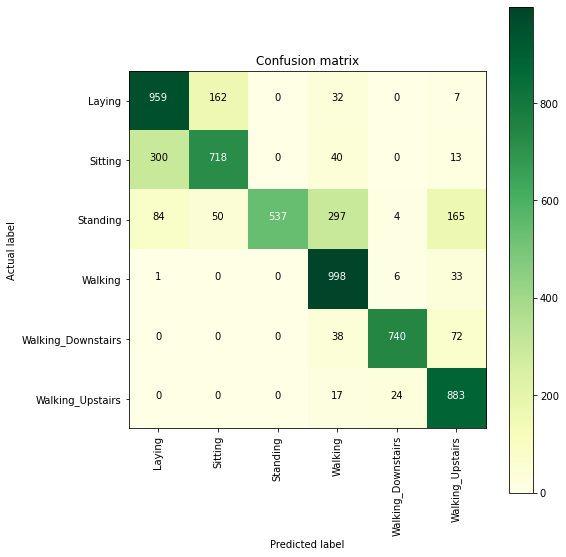

<span style='color:blue'>**Classifiction Report**</span>

              precision    recall  f1-score   support

           1       0.71      0.83      0.77      1160
           2       0.77      0.67      0.72      1071
           3       1.00      0.47      0.64      1137
           4       0.70      0.96      0.81      1038
           5       0.96      0.87      0.91       850
           6       0.75      0.96      0.84       924

    accuracy                           0.78      6180
   macro avg       0.82      0.79      0.78      6180
weighted avg       0.81      0.78      0.77      6180



<span style='color:blue'>**Best Estimator:**</span>

LinearSVC(C=8)



<span style='color:blue'>**Best parameters:**</span>

{'C': 8}



<span style='color:blue'>**Number of CrossValidation sets:**</span>

5



<span style='color:blue'>**Best Score:**</span>

0.7671887718387618



In [ ]:

# Let's define the parameters to be tuned

parameters = {'C':[0.25, 0.5, 1, 2, 4, 8]}

# Let's initiate the model

lin_svc = LinearSVC()
lin_svc_grid = GridSearchCV(lin_svc, param_grid=parameters, verbose=1, n_jobs=-1)
lin_svc_grid_results = perform_model(lin_svc_grid, X_train, y_train, X_test, y_test, class_labels=labels)

# Printing the best attributes of the model 

print_grid_search_attributes(lin_svc_grid_results['model'])


### Decision Tree Classifier

Fitting 5 folds for each of 6 candidates, totalling 30 fits


<span style='color:blue'>Training_time(HH:MM:SS.ms) - 0:00:07.981757</span>

<span style='color:blue'>testing time(HH:MM:SS:ms) - 0:00:00.031223</span>

<span style='color:blue'>**Accuracy:**</span>

0.9173139158576051


<span style='color:blue'>**Confusion Matrix:**</span>

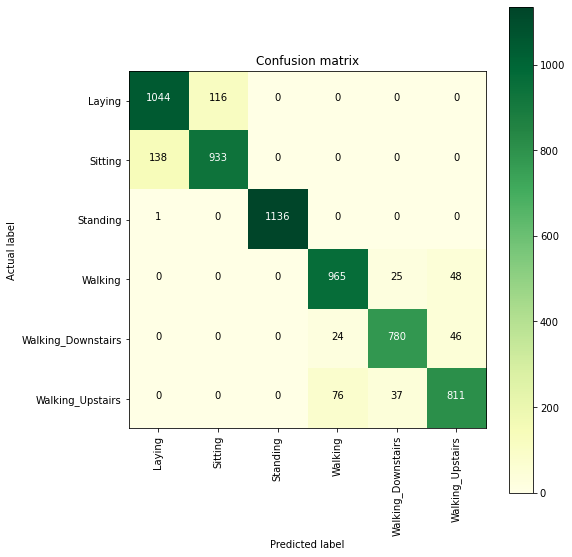

<span style='color:blue'>**Classifiction Report**</span>

              precision    recall  f1-score   support

           1       0.88      0.90      0.89      1160
           2       0.89      0.87      0.88      1071
           3       1.00      1.00      1.00      1137
           4       0.91      0.93      0.92      1038
           5       0.93      0.92      0.92       850
           6       0.90      0.88      0.89       924

    accuracy                           0.92      6180
   macro avg       0.92      0.92      0.92      6180
weighted avg       0.92      0.92      0.92      6180



<span style='color:blue'>**Best Estimator:**</span>

DecisionTreeClassifier(max_depth=9)



<span style='color:blue'>**Best parameters:**</span>

{'max_depth': 9}



<span style='color:blue'>**Number of CrossValidation sets:**</span>

5



<span style='color:blue'>**Best Score:**</span>

0.9244942136866072



In [ ]:
#DecisionTreeClassifier
parameters = {'max_depth':np.arange(4,10,1)}
dtree = DecisionTreeClassifier()
dtree_grid = GridSearchCV(dtree, param_grid=parameters, verbose=1, n_jobs=-1)
dtree_grid_results = perform_model(dtree_grid, X_train, y_train, X_test, y_test, class_labels=labels)
print_grid_search_attributes(dtree_grid_results['model'])

### KNN from the stratch


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from os import listdir
from os.path import isfile, join
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [ ]:
def get_dist(x1, x2):
    return np.linalg.norm(x1 - x2)
#function for getting distance b/w 2 points

In [ ]:
def get_k_neighbours(x_train, y_train, k, x):
    dist = []
    for i in range(y_train.size):
        dist.append(tuple((i, get_dist(x_train[i], x))))
    dist.sort(key=lambda x: x[1])
    return dist[:k+1]
#function for getting k nearest nearest points

In [ ]:
def get_pred(neighbours, y_train):
    count_0 = 0
    count_1 = 0
    for i in range(len(neighbours)):
        if y_train[neighbours[i][0]] == 0:
            count_0+=1
        else:
            count_1+=1
    return 1 if count_1>count_0 else 0
#function to get prediction

In [ ]:
def get_predictions(x_train, x_test, y_train, y_test, k):
    y_pred = []
    for i in range(y_test.size):
            neighbours = get_k_neighbours(x_train, y_train, k, x_test[i])
            y_pred.append(get_pred(neighbours, y_train))
    return y_pred
#function to get prediction on test set

In [ ]:
df = pd.read_csv("Cleaned_data.csv")
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
x_data = df[df.columns.difference(['Activity', 'subject'])]
y_data = df['Activity']
le = LabelEncoder()
y_data = le.fit_transform(y_data)

best_accuracy = 0
accuracy_sum = 0
best_k =  1
for k in range(1, 27, 2):
    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, shuffle=True, test_size = 1/3)
    x_train = x_train.to_numpy()
    x_test = x_test.to_numpy()
    y_pred = get_predictions(x_train, x_test, y_train, y_test, k)
    accuracy_sum += accuracy_score(y_test, y_pred)
    if best_accuracy < accuracy_score(y_test, y_pred):
        best_accuracy = accuracy_score(y_test, y_pred)
        best_k = k
    print(f"Classification report of k = {k}")
    print(classification_report(y_test, y_pred))
print(f"Average accuracy = {accuracy_sum/(25/2)}")
print(f"Best k = {best_k}")
#function to evalutate the model

Classification report of k = 1
              precision    recall  f1-score   support

           0       0.86      0.97      0.91       654
           1       0.18      0.82      0.30       594
           2       0.00      0.00      0.00       623
           3       0.00      0.00      0.00       593
           4       0.00      0.00      0.00       462
           5       0.00      0.00      0.00       507

    accuracy                           0.33      3433
   macro avg       0.17      0.30      0.20      3433
weighted avg       0.20      0.33      0.23      3433

Classification report of k = 3
              precision    recall  f1-score   support

           0       0.84      0.96      0.90       628
           1       0.18      0.81      0.29       598
           2       0.00      0.00      0.00       646
           3       0.00      0.00      0.00       572
           4       0.00      0.00      0.00       467
           5       0.00      0.00      0.00       522

    accuracy   

In [ ]:
print('\n                     Accuracy     Error')
print('                     ----------   --------')
print('Linear SVC          : {:.04}%       {:.04}% '.format(lin_svc_grid_results['accuracy'] * 100,\
                                                        100-(lin_svc_grid_results['accuracy'] * 100)))
print('Decision Tree       : {:.04}%      {:.04}% '.format(dtree_grid_results['accuracy'] * 100,\
                                                        100-(dtree_grid_results['accuracy'] * 100)))



                     Accuracy     Error
                     ----------   --------
Linear SVC          : 78.24%       21.76% 
Decision Tree       : 91.73%      8.269% 


In [ ]:
skf_results = pd.DataFrame([['Decision Tree', 0.84,0.86,0.85,0.83]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

skf_model = pd.DataFrame([['Linear SVM', 0.92,0.92,0.92,0.92]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
skf_results = skf_results.append(skf_model, ignore_index = True)

skf_model = pd.DataFrame([['KNN', 0.33,0.18,0.30,0.20]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
skf_results = skf_results.append(skf_model, ignore_index = True)

In [ ]:
skf_results

,Model,Accuracy,Precision,Recall,F1 Score
0,Decision Tree,0.84,0.86,0.85,0.83
1,Linear SVM,0.92,0.92,0.92,0.92
2,KNN,0.33,0.18,0.30,0.20


<BarContainer object of 3 artists>

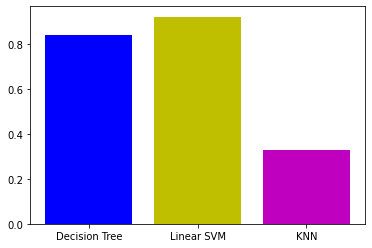

In [ ]:
import pandas as pd
 
import matplotlib.pyplot as plt
plt.bar(x=skf_results['Model'],
 
        height=skf_results['Accuracy'],
       color='bym')